Regression Analysis-Using Monthly Returns and Breakeven

In [ ]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

%matplotlib inline
plt.style.use('seaborn')

from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

commodities_UKInf = pd.read_csv('Monthly UK Inflation.csv') 

commodities_UKInf.head()

,Dates,MSCI World Net Total Return Lo,Bloomberg Commodity Index,S&P GSCI Energy Official Close,S&P GSCI Industrial Metals Off,S&P GSCI Precious Metals Offic,S&P GSCI Agriculture Official,S&P GSCI Gold Official Close I,UK RPI MOM
0,28/02/1983,0.020269,-0.065316,-0.020277,-0.020069,-0.181569,-0.029315,-0.182362,0.004
1,31/03/1983,0.041057,0.055005,0.081769,-0.000664,-0.033247,0.100171,-0.017627,0.002
2,29/04/1983,0.066327,0.011031,0.074299,0.027494,0.044967,-0.010472,0.027251,0.014
3,31/05/1983,-0.008829,0.007565,-0.006364,-0.005079,-0.024423,0.039052,-0.048565,0.004
4,30/06/1983,0.036510,-0.018557,0.045421,-0.045193,-0.025937,-0.018746,0.000000,0.002


In [ ]:
commodities_UKInf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Dates                           463 non-null    object 
 1   MSCI World Net Total Return Lo  463 non-null    float64
 2   Bloomberg Commodity Index       463 non-null    float64
 3   S&P GSCI Energy Official Close  463 non-null    float64
 4   S&P GSCI Industrial Metals Off  463 non-null    float64
 5   S&P GSCI Precious Metals Offic  463 non-null    float64
 6   S&P GSCI Agriculture Official   463 non-null    float64
 7   S&P GSCI Gold Official Close I  463 non-null    float64
 8   UK RPI MOM                      463 non-null    float64
dtypes: float64(8), object(1)
memory usage: 32.7+ KB


In [ ]:
commodities_UKInf['Dates'] =pd.to_datetime(commodities_UKInf['Dates'])

In [ ]:
commodities_UKInf.columns

Index(['Dates', 'MSCI World Net Total Return Lo', 'Bloomberg Commodity Index',
       'S&P GSCI Energy Official Close', 'S&P GSCI Industrial Metals Off',
       'S&P GSCI Precious Metals Offic', 'S&P GSCI Agriculture Official',
       'S&P GSCI Gold Official Close I', 'UK RPI MOM'],
      dtype='object')

In [ ]:
commodities_UKInf.columns = ['Dates', 'MSCI_World', 'Bloomberg_Commodity_Index','Energy', 'Industrial_Metals','Precious_Metals', 'Agriculture','Gold', 'UK_RPI']

In [ ]:
commodities_UKInf.set_index('Dates', inplace= True)

Rolling regression result for MSCI_World as target


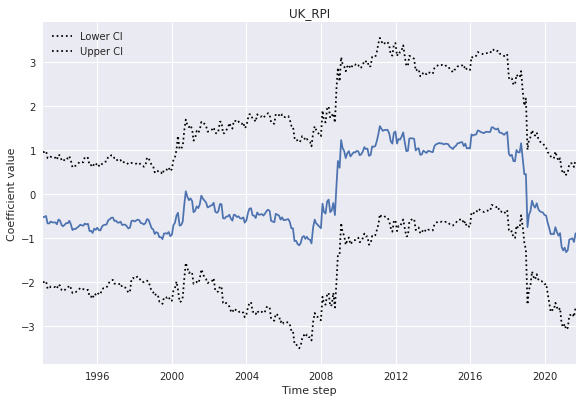

Rolling regression result for Bloomberg_Commodity_Index as target


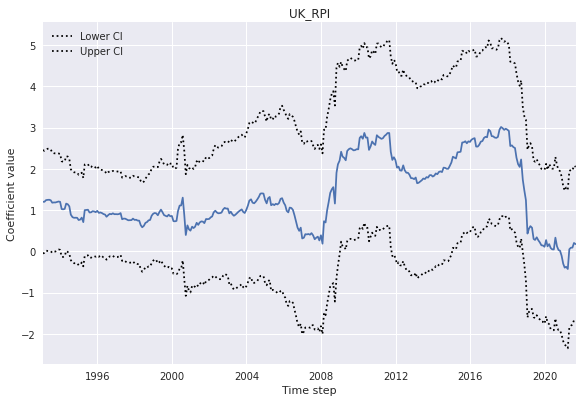

Rolling regression result for Energy as target


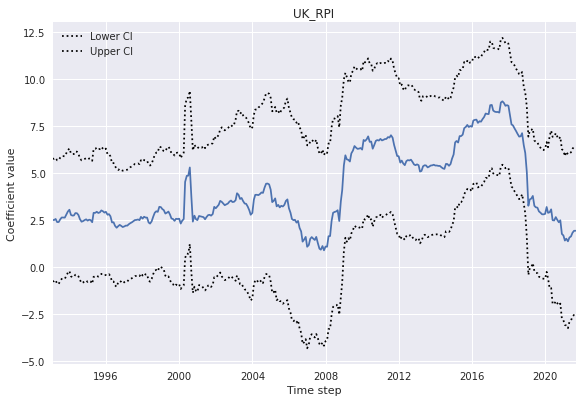

Rolling regression result for Industrial_Metals as target


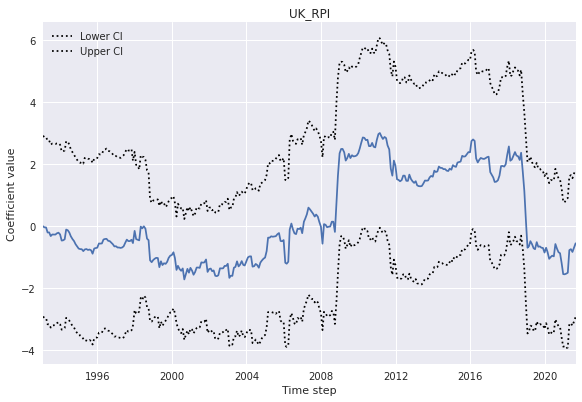

Rolling regression result for Precious_Metals as target


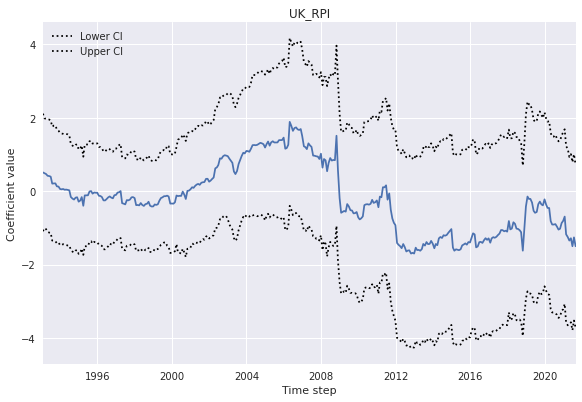

Rolling regression result for Agriculture as target


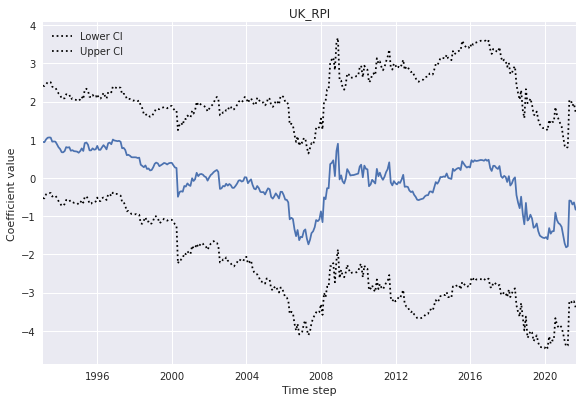

Rolling regression result for Gold as target


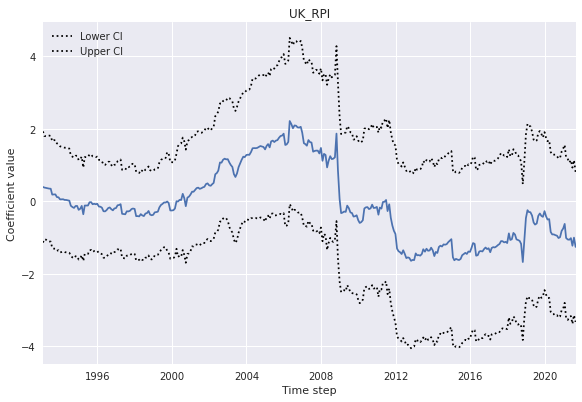

In [ ]:
from statsmodels.regression.rolling import RollingOLS

Sectors = ['MSCI_World', 'Bloomberg_Commodity_Index', 'Energy','Industrial_Metals', 'Precious_Metals', 'Agriculture', 'Gold']


for item in Sectors:
    roll_reg = RollingOLS.from_formula(f'{item} ~ UK_RPI', window=120, data=commodities_UKInf)
    model = roll_reg.fit()
    print(f'Rolling regression result for {item} as target')

    fig = model.plot_recursive_coefficient(variables=['UK_RPI'])
    plt.xlabel('Time step')
    plt.ylabel('Coefficient value')
    plt.show()
   

In [ ]:
commodities_UKInf['UK_RPI'].autocorr(lag=1)

0.11132877574484212

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

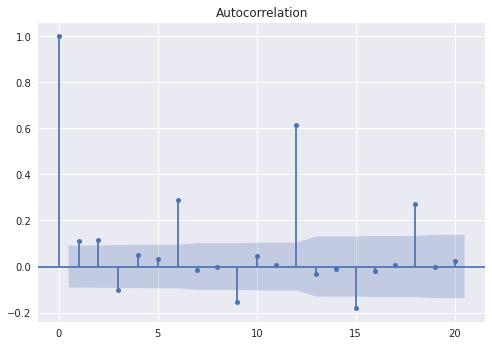

In [ ]:
sm.graphics.tsa.plot_acf(commodities_UKInf['UK_RPI'].dropna(), lags=20)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b9fd396c-9c1e-4ca6-8dc8-2011fa1e8fc7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>